# Model training

#### BTC-USDT for ROR_n24 with price action features


<br>

#### Performance by Model ID

```
model_id: 
    - n_estimates = 500
    - max_depth = 10 

```


```
model_id:
    - n_estimates = 500
    - max_depth=20
```



<br>

#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [1]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [2]:
# Load model data
data = dataObject("""
SELECT * EXCEPT(load_rank)
FROM (
  SELECT
  RANK() OVER (PARTITION BY ticker_time ORDER BY etl_time) AS load_rank,
  * EXCEPT(
    conversionType, conversionSymbol, open_close1,
    LAG1_open, LAG1_high, LAG1_low, LAG1_close,
    LAG2_open, LAG2_high, LAG2_low, LAG2_close,
    LAG3_open, LAG3_high, LAG3_low, LAG3_close,
    LAG4_open, LAG4_high, LAG4_low, LAG4_close,
    LAG5_open, LAG5_high, LAG5_low, LAG5_close,
    LAG6_open, LAG6_high, LAG6_low, LAG6_close,
    LAG7_open, LAG7_high, LAG7_low, LAG7_close,
    LAG8_open, LAG8_high, LAG8_low, LAG8_close,
    LAG9_open, LAG9_high, LAG9_low, LAG9_close,
    LAG10_open, LAG10_high, LAG10_low, LAG10_close,
    LAG11_open, LAG11_high, LAG11_low, LAG11_close,
    LAG12_open, LAG12_high, LAG12_low, LAG12_close,
    LAG13_open, LAG13_high, LAG13_low, LAG13_close,
    LAG14_open, LAG14_high, LAG14_low, LAG14_close,
    LAG15_open, LAG15_high, LAG15_low, LAG15_close,
    LAG16_open, LAG16_high, LAG16_low, LAG16_close,
    LAG17_open, LAG17_high, LAG17_low, LAG17_close,
    LAG18_open, LAG18_high, LAG18_low, LAG18_close,
    LAG19_open, LAG19_high, LAG19_low, LAG19_close,
    LAG20_open, LAG20_high, LAG20_low, LAG20_close,
    LAG21_open, LAG21_high, LAG21_low, LAG21_close,
    LAG22_open, LAG22_high, LAG22_low, LAG22_close,
    LAG23_open, LAG23_high, LAG23_low, LAG23_close,
    LAG24_open, LAG24_high, LAG24_low, LAG24_close,
    
    LAG1_volume_base, LAG2_volume_base, LAG3_volume_base,
    LAG4_volume_base, LAG5_volume_base, LAG6_volume_base,
    LAG7_volume_base, LAG8_volume_base, LAG9_volume_base,
    LAG10_volume_base, LAG11_volume_base, LAG12_volume_base,
    LAG13_volume_base, LAG14_volume_base, LAG15_volume_base,
    LAG16_volume_base, LAG17_volume_base, LAG18_volume_base,
    LAG19_volume_base, LAG20_volume_base, LAG21_volume_base,
    LAG22_volume_base, LAG23_volume_base, LAG24_volume_base
    )
  FROM `algom-trading.train_features.features_BTC_USDT_hour_i04_*`
  WHERE 
    _table_suffix IN (
      '20170101',
      '20180101',
      '20190101')
    AND year BETWEEN 2017 AND 2019
    AND LAG24_close > 0
)
WHERE load_rank = 1
ORDER BY ticker_time
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 20780/20780 [00:33<00:00, 626.40rows/s]

SUCCESS: Loaded SQL query.


In [3]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

20079


,ticker_time_sec,close,high,low,open,volume_base,volume,partition_date,etl_time,ticker_time,...,volume_lag15,volume_lag16,volume_lag17,volume_lag18,volume_lag19,volume_lag20,volume_lag21,volume_lag22,volume_lag23,volume_lag24
0,1503028800,4287.92,4292.39,4234.43,4292.39,50.69,216069.15,2021-01-04,2021-01-04 13:32:27.262061+00:00,2017-08-18 04:00:00+00:00,...,0.499514,0.788931,0.629151,0.750178,1.549893,3.977127,2.434399,1.947490,0.780284,0.130015
1,1503032400,4313.56,4340.62,4250.04,4287.92,64.00,274857.30,2021-01-04,2021-01-04 13:32:27.262061+00:00,2017-08-18 05:00:00+00:00,...,0.212652,0.732668,1.022085,0.862306,0.983332,1.783048,4.210282,2.667553,2.180644,1.013439
2,1503036000,4279.46,4316.98,4247.75,4313.56,63.95,274013.68,2021-01-04,2021-01-04 13:32:27.262061+00:00,2017-08-18 06:00:00+00:00,...,-0.058313,0.211870,0.731886,1.021304,0.861524,0.982551,1.782266,4.209500,2.666772,2.179862
3,1503039600,4300.25,4304.67,4270.48,4279.46,68.92,295447.38,2021-01-04,2021-01-04 13:32:27.262061+00:00,2017-08-18 07:00:00+00:00,...,0.025720,0.016532,0.286715,0.806731,1.096149,0.936369,1.057396,1.857111,4.284345,2.741617
4,1503043200,4282.73,4320.71,4259.85,4300.25,73.83,316938.59,2021-01-04,2021-01-04 13:32:27.262061+00:00,2017-08-18 08:00:00+00:00,...,0.215117,0.094538,0.085350,0.355534,0.875550,1.164967,1.005188,1.126214,1.925930,4.353164


<br>

### Initialize modelRegression class

In [4]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n48',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES
)

SUCCESS: Loaded dataObject.
Initialized model. As a next step, run self.predict() or self.train().


In [5]:
# len(model.feature_list)
# list(model.feature_list)

In [6]:
# Specify regression parameters
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(
    loss='ls', 
    learning_rate=0.1,
    n_estimators=500,
    subsample=.9,
    criterion='friedman_mse', 
    min_samples_split=3, 
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_depth=10,
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    init=None,
    random_state=None, 
    max_features=None, 
    alpha=0.9, 
    verbose=0,
    max_leaf_nodes=None, 
    warm_start=False, 
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001
)


# Train model
model.train(reg)


Training model on ROR_n48.
Model metadata added to `self.metadata.metadata`
Model metadata added to `self.metadata.parameters`
Set feature_importance to `self.feature_importance.feature_importance`
Fit model in 0:00:00.000018.
Get model performance.
Set evaluation to self.evaluations in 0:00:00.000018.
Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mean_abs_error
                - self.mean_abs_outcome
                - self.mean_abs_pct_error
                - self.error_var
            
Performance metrics added to `self.performance`

MODEL PERFORMANCE SUMMARY
        - Mean Absolute Error:	 0.04381
        - Mean Absolute Outcome:	 0.0431
        - Mean Absolute Percent Error:	 1.01641
        - Error Variance:	 0.00374
        - R-Squared:		 0.03016
        
PLOT PREDICTIONS: Use the following commandsto view model performance.
              `self.plot_predictions_by_date(start_date, end_date)`
              `self.plot_predicti

In [7]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


model_id: acdef7ff211cfb8bfb9d4689185c243fe5c37707
model_execution_id: b3c177cd3c3e679cb80877e374170031a4148346


In [8]:
# Save model (optional)
model.save()


Dumped model to:
	/home/jovyan/algomosaic/data/models/20210104_GradientBoostingRegressor_acdef7ff211cfb8bfb9d4689185c243fe5c37707.pickle
Uploaded pickle to Google Storage:
	https://storage.googleapis.com/algom-trading-sto/models/20210104_GradientBoostingRegressor_acdef7ff211cfb8bfb9d4689185c243fe5c37707.pickle
SUCCESS: Loaded DataFrame.


1it [00:06,  6.40s/it]

Uploaded storage metadata to Google BigQuery:
	storage.model_storage_YYYYMMDD
Saved model to Google Storage:
	models/20210104_GradientBoostingRegressor_acdef7ff211cfb8bfb9d4689185c243fe5c37707.pickle


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [9]:
start_date='2019-06-01'
end_date='2019-07-01'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


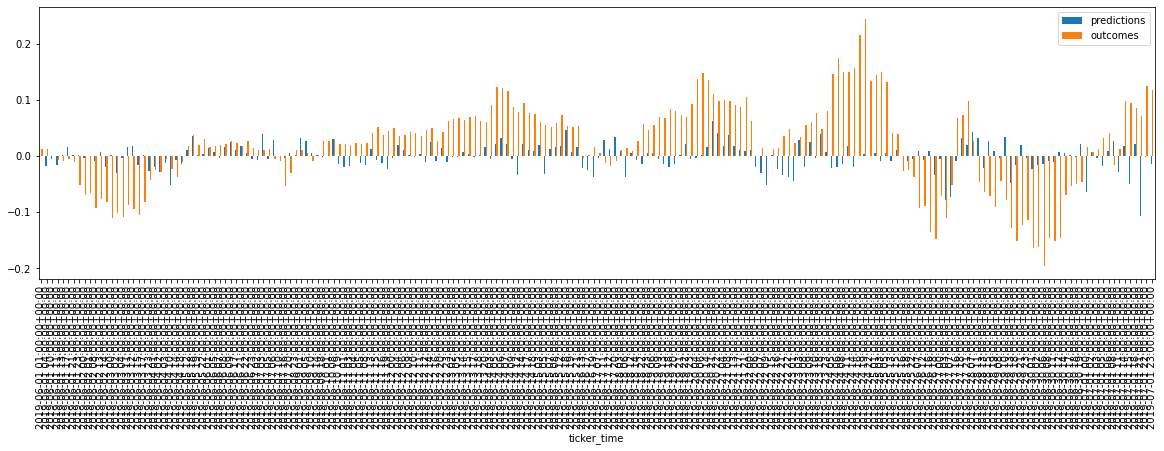

In [10]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


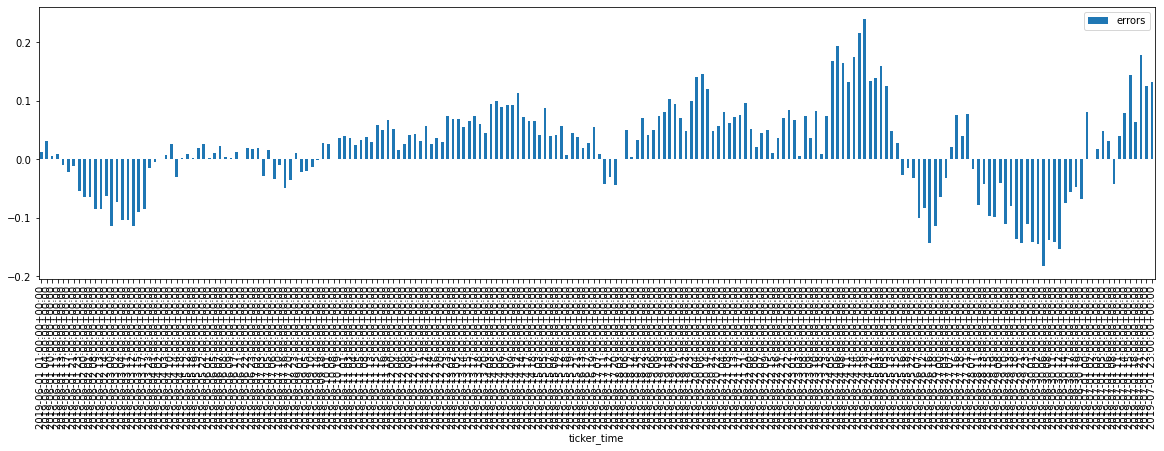

In [11]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


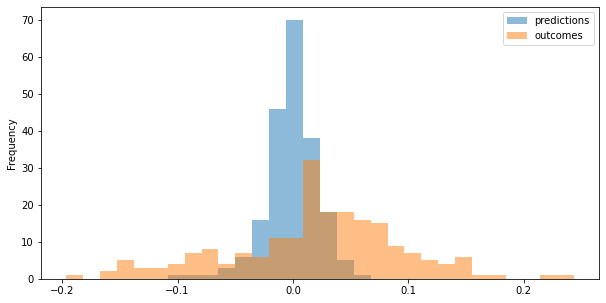

In [12]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


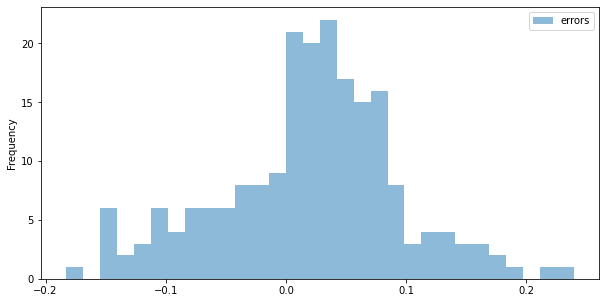

In [13]:
model_plot.plot_errors_histogram(start_date, end_date)

PLOT: Predictions by Date


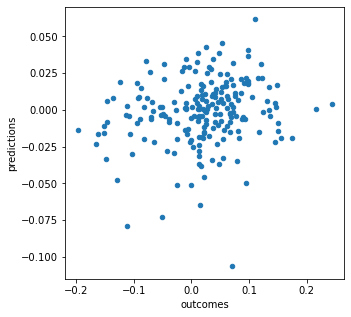

In [14]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### Most important features


In [15]:
features = model.feature_importance.feature_importance
features[0:30]


,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
0,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,day_of_week,0.02545,1.0,1.000000
1,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_high24,0.01780,2.0,0.989691
2,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_low1,0.01672,3.0,0.979381
3,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_high1,0.01600,4.0,0.969072
4,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,volume_lag20,0.01542,5.0,0.958763
5,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,volume_lag24,0.01540,6.0,0.948454
6,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,volume_lag23,0.01482,7.0,0.938144
7,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,volume_lag18,0.01464,8.0,0.927835
8,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_low2,0.01455,9.0,0.917526
9,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_low24,0.01410,10.0,0.907216


<br>

### Least import features

In [16]:
features[len(features)-20:len(features)]

,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
77,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_close10,0.00767,78.0,0.206186
78,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_high13,0.00747,79.0,0.195876
79,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_close9,0.00740,80.0,0.185567
80,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_close24,0.00737,81.0,0.175258
81,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_high15,0.00733,82.0,0.164948
82,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_low21,0.00721,83.0,0.154639
83,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_high22,0.00703,84.0,0.144330
84,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_close20,0.00698,85.0,0.134021
85,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_close18,0.00680,86.0,0.123711
86,b3c177cd3c3e679cb80877e374170031a4148346,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n48,open_close14,0.00671,87.0,0.113402


<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
